In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/Users/quents/Documents/git/SD201/shuffled_data.csv')
data.drop(columns = data.columns[0], inplace=True)
data.dropna()

data

,Date,Airline,Origin,Destination,DepTime,DepDelay,ArrTime,ArrDelay,AirTime,Distance,FlightNumber
0,2018-01-04,Delta Air Lines Inc.,MSP,MCO,1315.0,0.0,1710.0,0.0,148.0,1310.0,1487
1,2018-01-04,Delta Air Lines Inc.,ORD,ATL,1618.0,0.0,1903.0,0.0,82.0,606.0,1612
2,2018-01-15,Delta Air Lines Inc.,SLC,SEA,1117.0,0.0,1207.0,0.0,91.0,689.0,1099
3,2018-01-15,Delta Air Lines Inc.,ATL,CAK,942.0,0.0,1117.0,0.0,76.0,528.0,1190
4,2018-01-15,Delta Air Lines Inc.,ATL,HOU,1402.0,3.0,1513.0,0.0,115.0,696.0,1398
...,...,...,...,...,...,...,...,...,...,...,...
9995,2022-03-28,Alaska Airlines Inc.,ORD,PDX,1611.0,0.0,1831.0,0.0,239.0,1739.0,669
9996,2022-03-29,Alaska Airlines Inc.,SEA,SAN,957.0,7.0,1251.0,16.0,144.0,1050.0,1176
9997,2022-03-30,Alaska Airlines Inc.,OTZ,ANC,1135.0,0.0,1302.0,0.0,76.0,548.0,154
9998,2022-03-30,Alaska Airlines Inc.,SFO,EWR,749.0,4.0,1605.0,0.0,291.0,2565.0,183


First of all, we can try to see how each input is correlated to one another

In [63]:
airlines = data['Airline'].unique()


origins = data['Origin'].unique()
destinations = data['Destination'].unique()
airports = np.unique(np.concatenate([origins, destinations]))

# print(airports)
# print(origins)
# print(destinations)

def convertAirlines(airline):
    return(np.where(airlines == airline)[0][0])

def convertAirport(airport):
    return(np.where(airports == airport)[0][0])

data['Airline'] = data['Airline'].apply(convertAirlines)

data['Origin'] = data['Origin'].apply(convertAirport)
data['Destination'] = data['Destination'].apply(convertAirport)

In [64]:
corrMatrix = data.corr()
corrMatrix

,Airline,Origin,Destination,DepTime,DepDelay,ArrTime,ArrDelay,AirTime,Distance,FlightNumber
Airline,1.000000,0.005705,0.005122,-0.003849,-0.000526,0.010512,0.008263,-0.177703,-0.191834,0.430342
Origin,0.005705,1.000000,0.038079,-0.031178,0.015198,0.012270,0.016112,0.079555,0.098083,-0.030416
Destination,0.005122,0.038079,1.000000,0.016790,0.017470,0.018055,0.017382,0.124976,0.107627,-0.050096
DepTime,-0.003849,-0.031178,0.016790,1.000000,0.105761,0.693020,0.092743,-0.038889,-0.037802,0.007939
DepDelay,-0.000526,0.015198,0.017470,0.105761,1.000000,0.009955,0.983598,0.007850,0.009880,0.044044
ArrTime,0.010512,0.012270,0.018055,0.693020,0.009955,1.000000,0.003658,0.032521,0.030715,0.011499
ArrDelay,0.008263,0.016112,0.017382,0.092743,0.983598,0.003658,1.000000,0.011161,0.005070,0.051223
AirTime,-0.177703,0.079555,0.124976,-0.038889,0.007850,0.032521,0.011161,1.000000,0.984160,-0.299037
Distance,-0.191834,0.098083,0.107627,-0.037802,0.009880,0.030715,0.005070,0.984160,1.000000,-0.315462
FlightNumber,0.430342,-0.030416,-0.050096,0.007939,0.044044,0.011499,0.051223,-0.299037,-0.315462,1.000000


In [65]:
corrMatrix.style.background_gradient(cmap='coolwarm').set_precision(2)

/var/folders/bm/t8hxv1ms6s30y8czfw0pmfk00000gn/T/ipykernel_8522/2386100568.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corrMatrix.style.background_gradient(cmap='coolwarm').set_precision(2)


,Airline,Origin,Destination,DepTime,DepDelay,ArrTime,ArrDelay,AirTime,Distance,FlightNumber
Airline,1.00,0.01,0.01,-0.00,-0.00,0.01,0.01,-0.18,-0.19,0.43
Origin,0.01,1.00,0.04,-0.03,0.02,0.01,0.02,0.08,0.10,-0.03
Destination,0.01,0.04,1.00,0.02,0.02,0.02,0.02,0.12,0.11,-0.05
DepTime,-0.00,-0.03,0.02,1.00,0.11,0.69,0.09,-0.04,-0.04,0.01
DepDelay,-0.00,0.02,0.02,0.11,1.00,0.01,0.98,0.01,0.01,0.04
ArrTime,0.01,0.01,0.02,0.69,0.01,1.00,0.00,0.03,0.03,0.01
ArrDelay,0.01,0.02,0.02,0.09,0.98,0.00,1.00,0.01,0.01,0.05
AirTime,-0.18,0.08,0.12,-0.04,0.01,0.03,0.01,1.00,0.98,-0.30
Distance,-0.19,0.10,0.11,-0.04,0.01,0.03,0.01,0.98,1.00,-0.32
FlightNumber,0.43,-0.03,-0.05,0.01,0.04,0.01,0.05,-0.30,-0.32,1.00


In [10]:
indexArr = data[data['ArrDelay'] > 0].index
len(indexArr)

3099

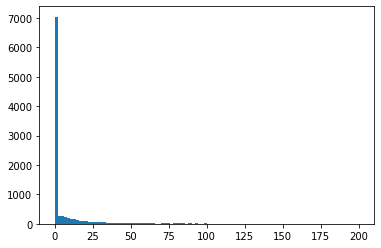

In [21]:
plt.hist(data['ArrDelay'], bins = 100, range = (0, 200))
plt.show()

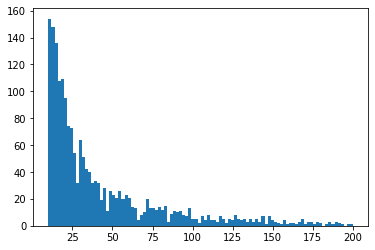

In [22]:
plt.hist(data['ArrDelay'], bins = 100, range = (10, 200))
plt.show()

In [24]:
mean = data['ArrDelay'].mean()
mean

11.406290694180106

In [28]:
quant = data['ArrDelay'].quantile(0.90)
quant

28.0

In [52]:
airlines = data['Airline'].unique()
arr = []
for airline in airlines:
    index = data[data['Airline'] != airline].index
    arr.append(data['ArrDelay'].drop(index))

In [49]:
for i in range(len(arr)):
    indexArr = arr[i][data['ArrDelay'] > 0].index
    perc = len(indexArr)/len(arr[i])
    print(airlines[i], ': Mean = ', str(arr[i].mean())[:4], " , Percentage of delays = ", str(perc)[:4])

Delta Air Lines Inc. : Mean =  9.35  , Percentage of delays =  0.26
Southwest Airlines Co. : Mean =  10.8  , Percentage of delays =  0.34
Spirit Air Lines : Mean =  9.17  , Percentage of delays =  0.27
SkyWest Airlines Inc. : Mean =  16.8  , Percentage of delays =  0.31
Alaska Airlines Inc. : Mean =  8.52  , Percentage of delays =  0.33
Comair Inc. : Mean =  11.0  , Percentage of delays =  0.31
Endeavor Air Inc. : Mean =  9.06  , Percentage of delays =  0.24
Hawaiian Airlines Inc. : Mean =  6.73  , Percentage of delays =  0.32


In [50]:
for i in range(len(arr)):
    print(airlines[i], ': 0.9 quantile = ', str(arr[i].quantile(0.9))[:4])

Delta Air Lines Inc. : 0.9 quantile =  18.0
Southwest Airlines Co. : 0.9 quantile =  31.0
Spirit Air Lines : 0.9 quantile =  24.8
SkyWest Airlines Inc. : 0.9 quantile =  42.0
Alaska Airlines Inc. : 0.9 quantile =  23.0
Comair Inc. : 0.9 quantile =  29.0
Endeavor Air Inc. : 0.9 quantile =  19.0
Hawaiian Airlines Inc. : 0.9 quantile =  21.6


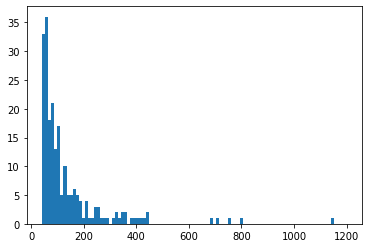

In [61]:
plt.hist(arr[3], bins = 100, range=(42, 1200))
plt.show()


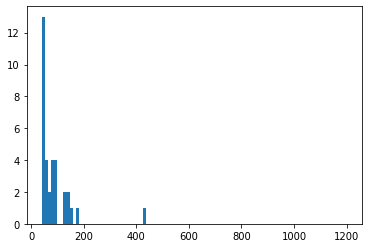

In [62]:
plt.hist(arr[4], bins = 100, range=(42, 1200))
plt.show()